# Youtube Likes,views Prediction

## Table of content
* 1.Machine Learning Formulation
    * 1.1 Data Overview
    * 1.2  Attribute-information（属性信息）
* 2.EDA

探索性数据分析（Exploratory Data Analysis，EDA）主要的工作是：对数据进行清洗，对数据进行描述（描述统计量，图表），查看数据的分布，比较数据之间的关系，培养对数据的直觉，对数据进行总结等

* 3.Feature Engineering

Feature engineering特征工程 目的就是选择、找到一个更好的Feature为的是predictive models预测模型更加准确。

    * 3.1 publish_weekday-Day at which video is publish
    * 3.2 No of Tags-No of tag video contain
    * 3.3 Length of description-Length of video description
    * 3.4 Ratio's （比例，比率）
         * 3.4.1 Ratio of View and likes
         * 3.4.2 Ratio of view and dislikes
         * 3.4.3 Ratio of view and comment_count
         * 3.4.4 Ratio of likes and dislikes
* 4.Correlation matrix（相关矩阵）
* 5.Machine Learning(metric=r^2 score )度量标准
    * 5.1-View Predicition
         * 5.1.1-Splitting the data into train and Test(80:20)
         * 5.1.2-Linear Regression
         * 5.1.3-Random Forest
              
  * 5.2 -Like Predicition
       * 5.2.1-Splitting the data into train and Test(80:20)
       * 5.2.2-Linear Regression
       * 5.2.3-Random Forest
       
  * 5.3-comment Count Predicition
      * 5.3.1-Splitting the data into train and Test(80:20)
      * 5.3.2-Linear Regression
      * 5.3.3-Random Forest
      
* 6.Conclusion

## 1.Machine Learning Formulation
### 1.1 Data Overviews
Contain one file

#### 1.2 Attribute-information 视频的各种属性
* video_id-Unique video id
* trending_date-the date at which video start trending
* title-Title of video
* channel_title-video posted by channel
* category_id-there are 15 Category value
* publish_time-at what time video is uplaoded
* tags-tag given to video
* views-no of views
* likes-no of likes
* dislikes-no of dislikes
* comment_count-no of comment




## 2.EDA

### Loading Libary

In [4]:
#Loading library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#（画图的）
import re
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import r2_score
#（评价指标）


In [5]:
youtube = pd.read_csv("USvideos.csv")
#youtube.head()

In [6]:
youtube['publish_time'].head()

0    2017-11-13T17:13:01.000Z
1    2017-11-13T07:30:00.000Z
2    2017-11-12T19:05:24.000Z
3    2017-11-13T11:00:04.000Z
4    2017-11-12T18:01:41.000Z
Name: publish_time, dtype: object

In [7]:
youtube[['title','tags','description']].head()

,title,tags,description
0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...
4,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...


In [8]:
youtube['score'] = (youtube['likes']-1.5*youtube['dislikes']) * youtube['comment_count'] /youtube['views']
view = youtube['views']
label = np.zeros(np.shape(view)) #label 格式
parameter = youtube['score']
n = len(view)
for i in range(n):
    if view[i] < 100000:
        label[i] = 0
    elif parameter[i] < 0:#score
        label[i] = 1
    elif parameter[i] < 300:
        label[i] = 2
    else:
        label[i] = 3
youtube['label']=label
#youtube.head()

In [9]:

youtube.drop(['video_id','thumbnail_link'],axis = 1, inplace =True)
print(youtube.shape)

(40949, 16)


In [10]:
print(youtube.isnull().values.any())
#是否有缺失值
youtube.isnull().sum()

True


trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
score                       0
label                       0
dtype: int64

In [11]:
youtube = youtube.dropna(how='any',axis=0)
#默认axis=0,how=‘any’,删除带有空值的行，只要有一个空值，就删除整行

In [12]:
youtube['label']= youtube['label'].astype('int')
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trending_date           40379 non-null  object 
 1   title                   40379 non-null  object 
 2   channel_title           40379 non-null  object 
 3   category_id             40379 non-null  int64  
 4   publish_time            40379 non-null  object 
 5   tags                    40379 non-null  object 
 6   views                   40379 non-null  int64  
 7   likes                   40379 non-null  int64  
 8   dislikes                40379 non-null  int64  
 9   comment_count           40379 non-null  int64  
 10  comments_disabled       40379 non-null  bool   
 11  ratings_disabled        40379 non-null  bool   
 12  video_error_or_removed  40379 non-null  bool   
 13  description             40379 non-null  object 
 14  score                   40379 non-null

In [13]:
youtube.describe()

#对于数值数据，结果的索引将包括计数，平均值，标准差，最小值，最大值以及较低的百分位数和50。
#默认情况下，较低的百分位数为25，较高的百分位数为75.50百分位数与中位数相同

,category_id,views,likes,dislikes,comment_count,score,label
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04,40379.000000,40379.000000
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03,384.557471,1.923946
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04,2179.299143,0.838949
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-9725.633929,0.000000
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02,10.677596,2.000000
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03,47.188129,2.000000
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03,191.223450,2.000000
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06,73470.691346,3.000000


In [14]:
print(youtube.shape)

(40379, 16)


In [15]:
youtube.apply(lambda x: len(x.unique()))
#apply（func，）  func为函数/运算法则 对某列（默认）/某行 进行运算
#Lambda函数又称匿名函数，匿名函数就是没有名字的函数
#冒号前是参数，冒号后是返回结果
#.unique() 去除其中重复的元素

trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
score                     39542
label                         4
dtype: int64

In [16]:
print(youtube.shape)

(40379, 16)


False    39775
True       604
Name: comments_disabled, dtype: int64
False    40210
True       169
Name: ratings_disabled, dtype: int64
False    40358
True        21
Name: video_error_or_removed, dtype: int64
24    9819
10    6437
26    4140
23    3435
22    3061
25    2409
28    2361
1     2340
17    2125
27    1642
15     916
20     803
19     402
2      379
43      57
29      53
Name: category_id, dtype: int64


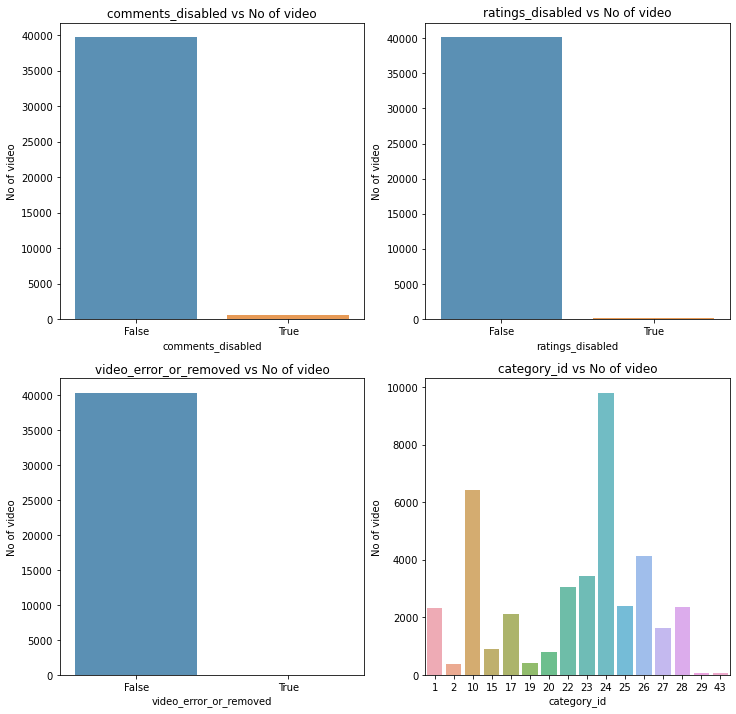

In [17]:

i=1
fig=plt.figure(figsize=(12,12))
for x in (['comments_disabled','ratings_disabled','video_error_or_removed','category_id']):
    
    count=youtube[x].value_counts()
    print(count)
    
    
   # plt.
    fig.add_subplot(2,2,i)
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    
    #subplot.show()
    i+=1
plt.show()

In [18]:
youtube.drop(['comments_disabled','ratings_disabled','video_error_or_removed'],axis=1,inplace = True)

## 3.Feature Engineering

 * 3.1 publish_weekday-Day at which video is publish
 * 3.2 No of Tags-No of tag video contain
 * 3.3 Length of description-Length of video description
 * 3.4 Ratio's
    * 3.4.1 Ratio of View and likes
    * 3.4.2 Ratio of view and dislikes
    * 3.4.3 Ratio of view and comment_count
    * 3.4.4 Ratio of likes and dislikes

In [19]:
#No of tags
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["No_tags"]=tags #新的列 自定义

#length of desription
desc_len=[len(x) for x in youtube["description"]]
youtube["desc_len"]=desc_len

#length of title
title_len=[len(x) for x in youtube["title"]]
youtube["len_title"]=title_len

publish_time = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
#youtube['publish_daytime'] = publish_time.dt.time
youtube['publish_date'] = publish_time.dt.date

#day at which video is publish
youtube['publish_weekday']=publish_time.dt.weekday_name

trending_date = pd.to_datetime('20'+youtube['trending_date'],format='%Y.%d.%m')
youtube['trending_day'] = trending_date.dt.date

time_gap = youtube['trending_day'] - youtube['publish_date']
time_gap =[x.days for x in time_gap]
youtube['trend_gap']=time_gap

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [ ]:
youtube['trend_gap'] = np.log10(youtube['trend_gap'] +1)

In [ ]:
#ratio of view/likes  upto 3 decimal
youtube["Ratio_View_likes"]=youtube["likes"]/youtube["views"]*100
#ratio of view/dislikes  upto 3 decimal
youtube["Ratio_View_dislikes"]=youtube["dislikes"]/youtube["views"]*100
#ratio of view/comment_count  upto 3 decimal
youtube["Ratio_views_comment_count"]=youtube["comment_count"]/youtube["views"] *100
#ratio of likes/dislikes  upto 3 decimal
youtube["Ratio_likes_dislikes"]=youtube["likes"]/youtube["dislikes"] /100

In [ ]:
print(max(youtube["Ratio_View_likes"]))
print(max(youtube["Ratio_View_dislikes"]))
print(max(youtube["Ratio_views_comment_count"]))
print(max(youtube["Ratio_likes_dislikes"]))

In [ ]:
#removing the infinite values
youtube=youtube.replace([np.inf, -np.inf], np.nan) #inf:infinite
youtube = youtube.dropna(how='any',axis=0)#删除有空值的行

In [ ]:
print(youtube.shape)

In [ ]:
youtube.head()

In [ ]:
youtube['publish_weekday'] = youtube['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

In [ ]:
count=youtube["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

## 4.Correlation  Matrix


In [ ]:
data = youtube[['views','likes','dislikes','comment_count']]

corr = data.corr()
#检查两个变量之间变化趋势的方向以及程度，值范围-1到+1，0表示两个变量不相关，正值表示正相关，负值表示负相关，值越大相关性越强。
plt.figure(figsize=(7, 7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot= True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
### Removing non Correlated coloumns

In [ ]:
youtube.drop(['trending_date','publish_date','publish_time','trending_day','channel_title','score'],axis=1,inplace=True)

In [ ]:
youtube.info()

In [ ]:
#np.log10(youtube['comment_count']+1).hist()

youtube['likes'] = np.log10(youtube['likes']+1)
youtube['dislikes'] = np.log10(youtube['dislikes']+1)
youtube['comment_count'] = np.log10(youtube['comment_count']+1)
#youtube['trend_gap'] = np.log10(youtube['trend_gap']+1)


In [ ]:


df = pd.DataFrame(
    {' no_videos of log10 likes ': youtube['likes']
    }
    )
df.hist()
df = pd.DataFrame(
    {' no_videos of log10 dislikes ': youtube['dislikes']
    }
    )
df.hist()
df = pd.DataFrame(
    {' no_videos of log10 comment_count ': youtube['comment_count']
    }
    )
df.hist()

In [ ]:
#youtube.drop(['views','channel_title'],inplace = True ,axis = 1) #title channel_title tags description
#youtube.drop(['score'],inplace = True ,axis = 1)
youtube.head()#17
#youtube.shape

In [ ]:
temp = youtube['description'][0]#list

temp_glove = glove_embedding_one_string(temp ,dictionary)

In [ ]:
temp_glove.shape

In [ ]:
def glove_embedding_one_string(string, dictionary):#小
    words = string.lower().split()
    new_words = [re.sub('[{}!#?,.:";@$%^&*()_+-=|[]:;">/?<,.~]', '', word) for word in words]
    temp = [dictionary[i] for i in new_words if i in dictionary.keys()]
    #循环记录段落中的符合的词向量
    temp = np.array(temp)
   # print(temp.shape)
    return np.sum(temp, axis=0) #每一段求和 作为整段的输出向量


def glove_embedding(list, dictionary):#输入所有title 
    n, t = len(list), 0 #n = 样本个数
    l = dictionary['a'].shape[0]#25维
    temp = np.zeros((n, l))
    for i in list:# i 为段落
        temp[t] = glove_embedding_one_string(i, dictionary)#
        t += 1
    return np.array(temp)


In [ ]:

def loadGolveModel(glove_file):#
    f = open(glove_file, 'r', encoding='UTF-8')
    model = {}
    for line in f:
        splitline = line.split()
        word = splitline[0].replace("'", "")
        embedding = np.array([float(val) for val in splitline[1: ]])
        model[word] = embedding
        #word 是key glove本身就是个词典，就是load进来
    print("Done.", len(model), "words loaded!")
    return model

dictionary = loadGolveModel('../input/glove-global-vectors-for-word-representation/glove.twitter.27B.25d.txt')



In [ ]:
dictionary

In [ ]:
title = youtube['title']
description =youtube['description']
tags = youtube['tags']
glove_title = glove_embedding(title, dictionary)
glove_description = glove_embedding(description, dictionary)
glove_tags = glove_embedding(tags, dictionary)


#均为25维 

In [ ]:
glove_title[0].shape

In [ ]:
text = np.hstack((glove_title, glove_description, glove_tags))

In [ ]:
text.shape

In [ ]:
pd.DataFrame(text).head()

In [ ]:
youtube.drop(['title','tags','description','views'],inplace = True,axis = 1)
youtube.head()

In [ ]:
youtube.info()

In [ ]:
#有问题 不采用
#final = pd.concat([youtube,pd.DataFrame(text)],axis=1)

train_target = youtube['label']
youtube.drop(['label'],inplace = True,axis = 1)
a = youtube.values 
b =np.hstack((a,text))

final_train = b
#pd.DataFrame(b)

In [ ]:
c =train_target.value_counts()
(1 / (c / len(train_target)) ).round(2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(final_train, train_target, test_size = 0.3, random_state = 121)

In [ ]:
x_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import GradientBoostingClassifier



rf = RandomForestClassifier(random_state=27 , n_estimators=100)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
'''
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))
print(accuracy_score(y_train, rf.predict(x_train)))
'''
from sklearn.metrics import f1_score as f1
f1_score = f1(y_test, prediction, average='weighted')
print('f1_score:', f1_score)

In [ ]:

#sgd
sgd = SGDClassifier(random_state=0, alpha=1, loss="modified_huber", penalty='l2', tol=0.001, max_iter=10000, fit_intercept=False)
sgd.fit(x_train, y_train)
prediction = sgd.predict(x_test)
print(accuracy_score(y_test, prediction))
print(accuracy_score(y_train, sgd.predict(x_train)))


In [ ]:
gb = GradientBoostingClassifier(max_depth=5,  n_estimators=100)

gb.fit(x_train, y_train)
print('Finish GBM fit')
prediction = gb.predict(x_test)
print('Finish GBM prediction')
'''
print(accuracy_score(y_test, prediction))
print(accuracy_score(y_train, gb.predict(x_train)))

'''
f1_score = f1(y_test, prediction, average='weighted')
print('f1_score:', f1_score)

In [ ]:
    
    
svc = svm.SVC(C=1.0, cache_size=200, coef0=1.0,decision_function_shape='ovo', degree=5, kernel='rbf', probability=False, shrinking=True,tol=0.001)
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)

print(accuracy_score(y_test, prediction))
print(accuracy_score(y_train, svc.predict(x_train)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

#print(accuracy_score(y_test, prediction))
#print(accuracy_score(y_train, knn.predict(x_train)))

f1_score = f1(y_test, prediction, average='weighted')
print('f1_score:', f1_score)

In [ ]:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', activation='logistic', alpha=0.4, tol=1e-5,
                        hidden_layer_sizes=(100, 20), max_iter=500)
mlp.fit(x_train, y_train)
prediction = mlp.predict(x_test)
#print(accuracy_score(y_test, prediction))
#print(accuracy_score(y_train, mlp.predict(x_train)))
f1_score = f1(y_test, prediction, average='weighted')
print('f1_score:', f1_score)

In [ ]:
'''
2     1.48
3     5.22
0     8.18
1    83.20
'''
clf = RandomForestClassifier(random_state=27 , n_estimators=100,
                                 class_weight={0:8.18, 1:83.20, 2:1.48, 3:5.22})
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_score(y_test, prediction)


In [ ]:
type(y_train.values)


In [ ]:
from sklearn import svm
clf_svc = svm.SVC(C=1.0, kernel='poly',  tol=0.001)
clf_svc.fit(x_train, y_train)
prediction = clf_svc.predict(x_test)
accuracy_score(y_test, prediction)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

a = youtube['title'].str.lower().str.cat(sep=' ')#str

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)#去除了标点符号 str

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))        #停用词 
nltk_words = list(stopwords.words('english'))   #停用词
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)#去除了b中的停用词
#filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
#获得filtered_sentence 类型list
#所有title的词


# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]  

In [ ]:
#注意 tags这一特征 是独立的词，不是句子
tags_lower = youtube['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
#filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]  

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
#desc_lower = youtube['description'].str.lower().str.cat(sep=' ')
   #remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stop_words.append("'s")
desc_list = []
for desc_lower in youtube['description']:
    
    desc_lower=desc_lower.lower()
    
    desc_remove_pun = re.sub(r'http://[a-zA-Z0-9.?/&=:_-]*', ' ', desc_lower)#http

    desc_remove_pun = re.sub(r'https://[a-zA-Z0-9.?/&=:_-]*', ' ', desc_remove_pun)#https

    desc_remove_pun = re.sub(r'www.[a-zA-Z0-9.?/&=:_-]*', ' ', desc_remove_pun)#www
    
    desc_remove_pun = desc_remove_pun.replace(r'\n', ' ')#换行符

    desc_remove_pun=re.sub('[^a-zA-Z0-9\']+', ' ', desc_remove_pun)#

    word_tokens_desc = word_tokenize(desc_remove_pun)
    
    filtered_sentence_desc = []
    for w_desc in word_tokens_desc:
        if w_desc not in stop_words:
            if len(w_desc) > 1 :
                filtered_sentence_desc.append(w_desc)
    
    desc_list.append(filtered_sentence_desc)








In [ ]:
youtube['description'].head()

In [ ]:
import gensim
from gensim.models import Word2Vec
model=Word2Vec(desc_list)
#,sg=1,size=100,window=5,min_count=2,negative=3,sample=0.001,hs=1,workers=4

In [ ]:
i=0
wordlist = ['music']
while(1):
    wordlist.append(model.most_similar("music",topn=10)[i][0])
    i = i+1
    if i == 10:
        break
    


In [ ]:
model.most_similar("music",topn=10)

In [ ]:
model[model.wv.vocab][0]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot
X = model[wordlist]#model[model.wv.vocab]
pca = PCA(n_components=2)
#result = pca.fit_transform(X)
X = TSNE(n_components=2).fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = wordlist#list(model.wv.vocab)
for i, word in enumerate(words):
    if i < 11:
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [ ]:
len(model.wv.vocab)

In [ ]:
model.similarity("music","song") 

In [ ]:
youtube.head()

In [ ]:
np.array(desc_list).shape

In [ ]:
#desc_lower = youtube['description'].str.lower().str.cat(sep=' ')
desc_lower =youtube['description'][5]
desc_remove_pun = re.sub(r'http://[a-zA-Z0-9.?/&=:_-]*', ' ', desc_lower)#http

desc_remove_pun = re.sub(r'https://[a-zA-Z0-9.?/&=:_-]*', ' ', desc_remove_pun)#https

desc_remove_pun = re.sub(r'www.[a-zA-Z0-9.?/&=:_-]*', ' ', desc_remove_pun)#www

desc_remove_pun = desc_remove_pun.replace(r'\n', ' ')#换行符

desc_remove_pun=re.sub('[^a-zA-Z0-9\']+', ' ', desc_remove_pun)#

word_tokens_desc = word_tokenize(desc_remove_pun)
    
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        if len(w_desc) > 1 :
            filtered_sentence_desc.append(w_desc)
    

In [ ]:
desc_remove_pun

In [ ]:
filtered_sentence_desc

## 5.Machine Learning Models

## 5.1 Prediciting Views

### 5.1.1 spliting the data into train and test in ratio of  80:20 

In [ ]:
youtube=pd.read_csv('USvideos.csv')
youtube.drop(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace = True ,axis = 1)
views=youtube['views']
youtube_view=youtube.drop(['views'],axis=1,inplace=False) #新的dataframe 去掉了view这一列

In [ ]:
train,test,y_train,y_test=train_test_split(youtube_view,views, test_size=0.2,shuffle=False)
#train 未知views的值 作为特征输入
'''
完整模板：

train_X,test_X,train_y,test_y = train_test_split(train_data,train_target,test_size=0.3,random_state=5)

参数解释：

train_data：待划分样本数据

train_target：待划分样本数据的结果（标签）

test_size：测试数据占样本数据的比例，若整数则样本数量

random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样
'''

'\n完整模板：\n\ntrain_X,test_X,train_y,test_y = train_test_split(train_data,train_target,test_size=0.3,random_state=5)\n\n参数解释：\n\ntrain_data：待划分样本数据\n\ntrain_target：待划分样本数据的结果（标签）\n\ntest_size：测试数据占样本数据的比例，若整数则样本数量\n\nrandom_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样\n'

In [ ]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


(32759, 4) (8190, 4) (32759,) (8190,)


## 5.1.2 Linear Regression

In [ ]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results  
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 5967621.961775875
Variance score: 0.78
Result : 0.7799799328428563
       True Labels  Predicted Labels
32759      1079622      2.297979e+06
32760       553759      4.130473e+05
32761      1105860      2.255149e+06
32762      1324533      2.795263e+06
32763      4713144      1.050739e+07
...            ...               ...
40944      1685609      1.409003e+06
40945      1064798      1.834251e+06
40946      1066451      1.498942e+06
40947      5660813      5.458481e+06
40948     10306119      1.426507e+07

[8190 rows x 2 columns]


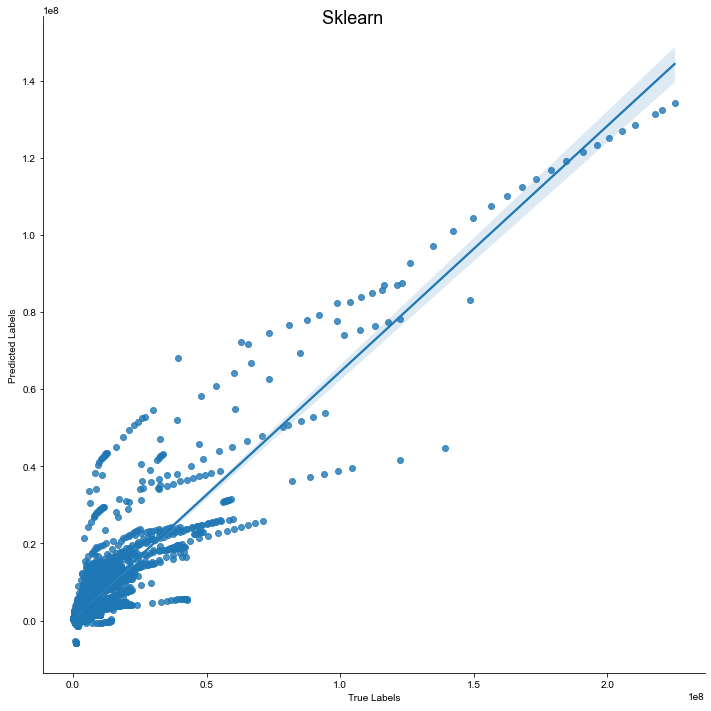

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## 5.1.3 Random Forest

## 5.1.3.1 Hyper-parameter Turning

In [20]:
from sklearn.ensemble import RandomForestRegressor
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
# plt.xlabel('n_estimators')
# plt.ylabel('max_depth')
# plt.colorbar()
# plt.xticks(np.arange(len(nEstimator)), nEstimator)
# plt.yticks(np.arange(len(depth)), depth)
# plt.title('Grid Search r^2 Score')
# plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

NameError: name 'train' is not defined

## 5.1.3.2 Random Forest using Optimal Hyperparameter

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

NameError: name 'nEstimators' is not defined

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 5.2 Prediciting Likes

### 5.2.1 spliting the data into train and test in ratio of  80:20 

In [ ]:
likes=youtube['likes']
youtube_like=youtube.drop(['likes'],axis=1,inplace=False)

In [ ]:
train,test,y_train,y_test=train_test_split(youtube_like,likes, test_size=0.2,shuffle=False)

In [ ]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

### 5.2.2 Linear Regression

In [ ]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### 5.2.3 Random Forest

### 5.2.3.1 Hypermeter Turning

In [ ]:
from sklearn.ensemble import RandomForestRegressor

nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

### 5.2.3.2 Random Forest using the optimal hypermeter

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## 5.3 Prediciting No of Comment

### 5.3.1 spliting the data into train and test in ratio of  80:20 

In [ ]:
comment_count=youtube['comment_count']
youtube_comment=youtube.drop(['comment_count'],axis=1,inplace=False)

In [ ]:
train,test,y_train,y_test=train_test_split(youtube_comment,comment_count, test_size=0.2,shuffle=False)

In [ ]:
print(train.shape,test.shape,y_train.shape,y_test.shape)


### 5.3.2 Linear Regression

In [ ]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### 5.3.3 Random Forest

### 5.3.3.1 Hypermeter Turning

In [ ]:
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

### 5.3.3.1 RandomForest optimal Hyper-Parameter

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)


## 6.Conclusion
### View Predicition

|Model|Variance|Result|
|-----|--------|------|
|Linear Regression|0.73|0.734|
|Random Forests|0.98|0.984|

### Like Predicition

|Model|Variance|Result|
|-----|--------|------|
|Linear Regression|0.41|0.411|
|Random Forests|0.96|0.958|


### No of Comment

|Model|Variance|Result|
|-----|--------|------|
|Linear Regression|0.35|0.35|
|Random Forests|0.81|0.81|
